# Automatizce ve fyzice: Gitlab, CI/CD

Petr Čermák  
2024-10-10

# GIT

## Připojte se!

[cermak.science/teaching/automation/lectures/02-gitlab/](https://cermak.science/teaching/automation/lectures/02-gitlab/)

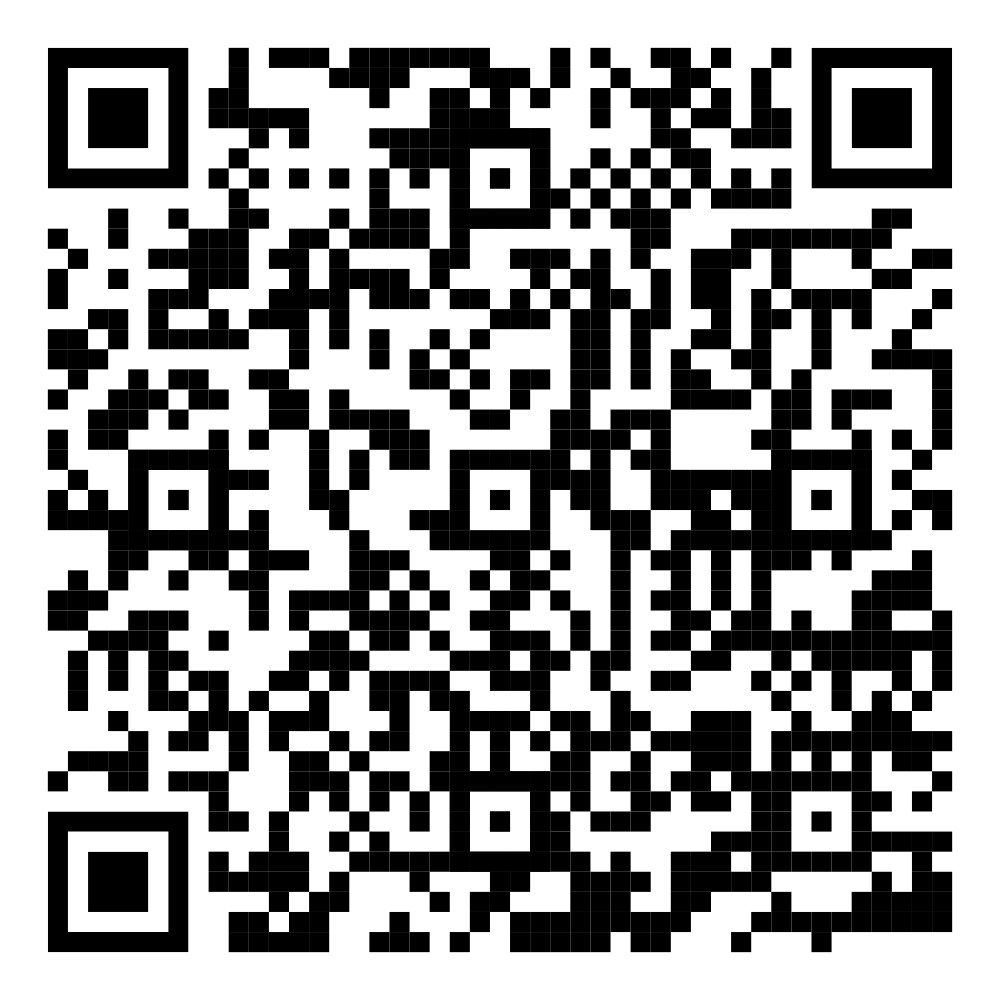

## Co to je?

. . .

“git” can mean anything, depending on your mood.

-   random three-letter combination that is pronounceable, and not
    actually used by any common UNIX command. The fact that it is a
    mispronounciation of “get” may or may not be relevant.
-   stupid. contemptible and despicable. simple. Take your pick from the
    dictionary of slang.
-   “global information tracker”: you’re in a good mood, and it actually
    works for you. Angels sing, and a light suddenly fills the room.
-   “goddamn idiotic truckload of sh\*t”: when it breaks

Zdroj: [Původní readme file
gitu](https://github.com/git/git/blob/e83c5163316f89bfbde7d9ab23ca2e25604af290/README)

## Jak to použít

Využití pro:

-   ukládání kódu
-   latex
-   obrázky (limitovaně)
-   data (limitovaně)

Umožňuje

-   verzování
-   větvení
-   kdo co změnil

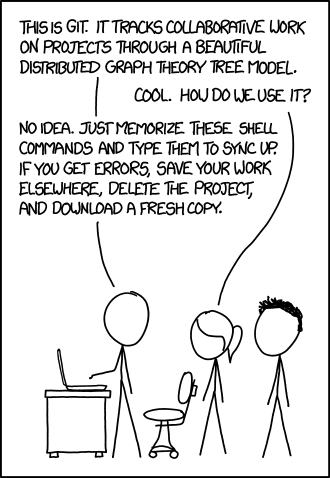

## Instalace gitu

-   Git website: [git-scm.com](http://git-scm.com/)
    -   E-book zadarmo: [git-scm.com/book](http://git-scm.com/book)
    -   Reference page for Git:
        [gitref.org](http://gitref.org/index.html)
    -   Git tutorial:
        [schacon.github.com](http://schacon.github.com/git/gittutorial.html)
    -   Git for Computer Scientists:
        [eagain.net](http://eagain.net/articles/git-for-computer-scientists/)
-   Z příkazové řádky:
    -   `git help [add/commit/config...]`

## Centralizované verzování

-   Např: Subversion, CVS, Perforce, etc.
-   Centrální serverový repositář (repo) drží jedinou správnou kopii
    -   je zde uchována celá historie
-   Uživetel dělá “checkouty”
    -   provede změny
    -   změny najsou nerzovány
-   Když je hotovo, provede se “check in” na server
    -   na serveru se zvýši verze

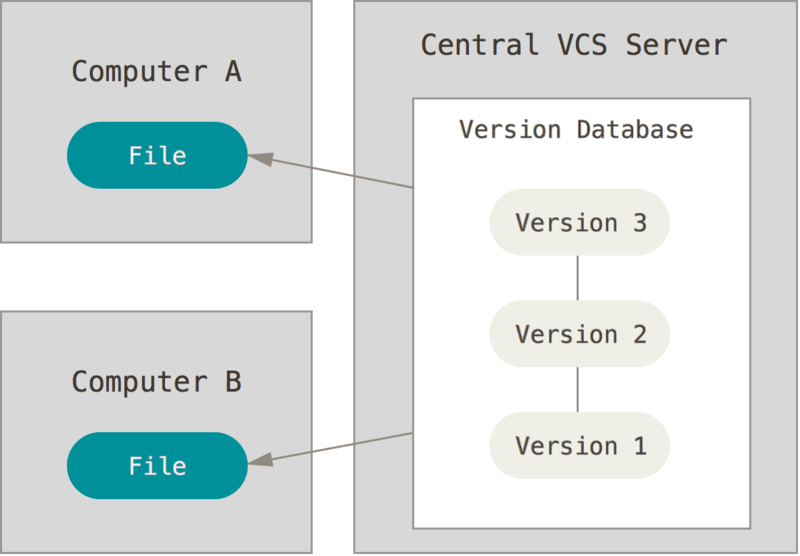

## Distribuované verzování (git)

-   Např: git, mercurial
-   nedělá se `checkout`
    -   `clone` a `pull`
    -   je zde uchována celá historie
-   Zkopíruje se celá větev, včetně celé historie
    -   máme stejná data jako na serveru
-   většina operací se děje lokálně
    -   `stage`, `commit`, `branch`
    -   máme vlastní historii u sebe
-   Když je hotovo, provede se “push” na server
    -   synchronizují se změny, řeší se konflikty

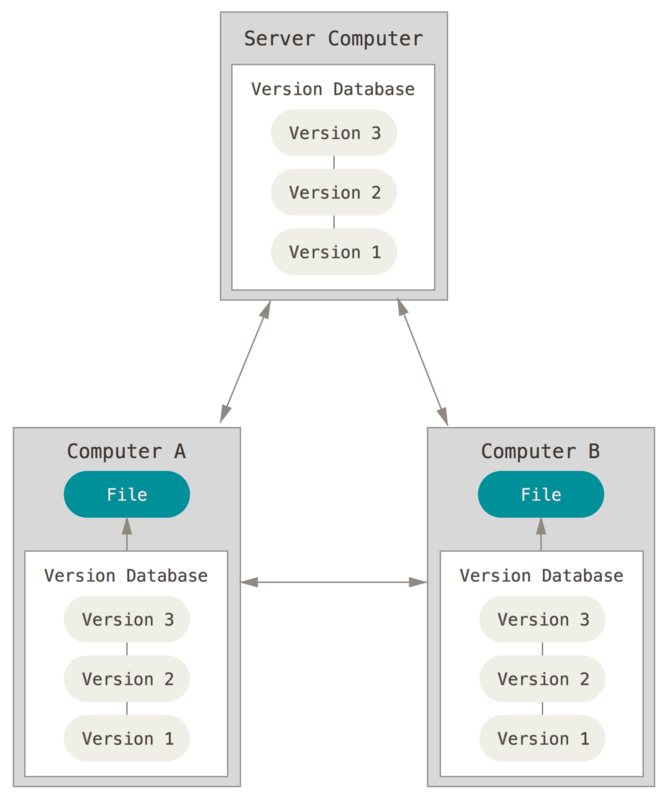

## Snapshoty

-   centralizované systémy často trackují každý file zvlášť (snapshots)
-   Git si oproti tomu dělá snapshoty
    -   nezměněné fily jsou jen jako odkazy
    -   trochu více data
    -   mnohem rychlejší porovnávání

SVN

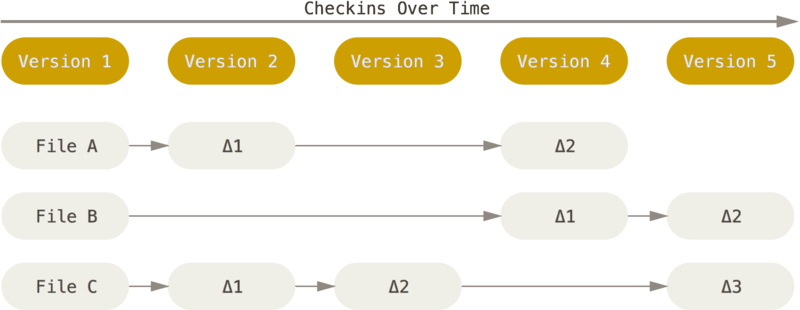

git

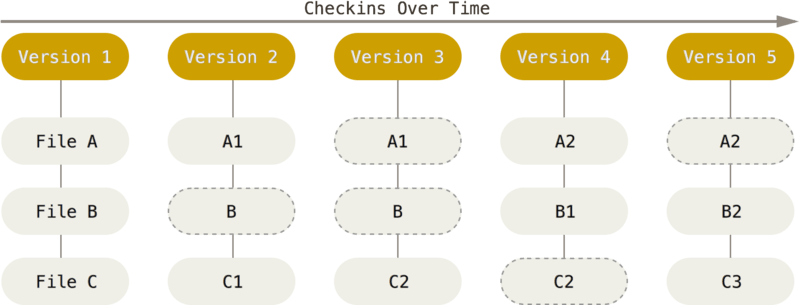

## Jak to funguje

-   Každý repozitář má soubory v několika oblastech
    -   *committed* - uložená, verzovaná
    -   *working copy* - rozpracované soubory
    -   *staging area* - soubory připravené ke commitu
-   *Commit* udělá snapshot ze všech souborů ve *staging area*
-   Commity se značí hashem (SHA-1), často se vypisuje jen prvních 7
    znaků

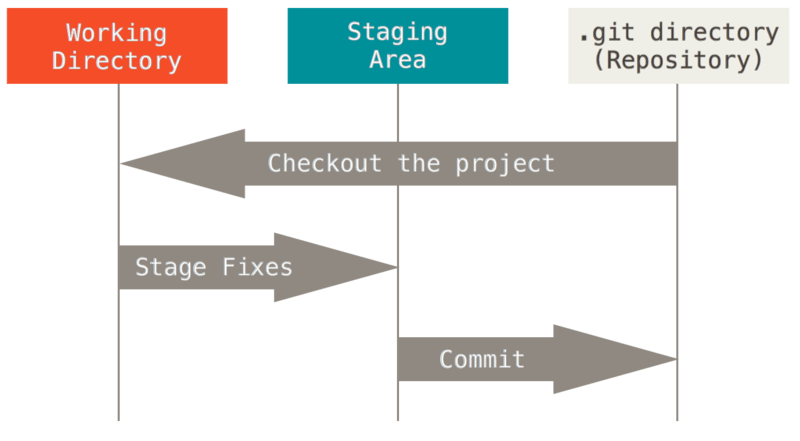

Pracujeme stylem:  
*modify* -\> *stage* -\> *commit*

## Úvodní nastavení

-   Nastavení jména a emailu (nutné!!)

``` bash
git config --global user.name "John Rambo" 
git config --global user.email john.rambo@matfyz.cuni.cz
```

-   Nano vs vim - nastavte si editor

``` bash
git config --global core.editor nano 
```

-   Zkontrolujte nastavení

``` bash
git config --list
```

Lokální je uloženo ve filu `.git/config`

## Vytvoření repozitáře

-   1.  Vytvoření nového repozitáře

    -   bez `-m` by se otevřel editor

``` bash
git init
git add test.py
git add .
git commit -m "První commit"
```

-   1.  klonování existujíhího repa (remote)

    -   vytvoří nový adresář *folder*

``` bash
git clone url folder
```

## Git příkazy

| příkaz                |                                                     |
|-----------------|-------------------------------------------------------|
| git clone url \[dir\] | zkopíruje vzdálený repo na lokální disk             |
| git add \[file\]      | přidá soubor(y) do staging area (tečka přidá vše)   |
| git commit            | vytvoří snaphot ze souborů ve staging               |
| git status            | zobrazí stav repozitáře, jaké soubory jsou kde atd. |
| git diff              | zobrazí změny v souborech                           |
| git help              | nápověda                                            |
| git pull              | stáhne data z remote (fetch) a zkusí je mergnout    |
| git push              | odešle změny na remote                              |

další: init, reset, branch, checkout, merge, log, tag, …

## Jak funguje zpět?

-   Nepřidal jsem file do stage

``` bash
git status               # zobrazí stav
git diff test.py         # zobrazí změny
git checkout -- test.py  # vrátí změny k poslednímu commitu
git reset --hard         # vrátí vše na poslední commit
```

## Jak funguje zpět?

-   Přidal jsem file do stage

``` bash
git restore --staged test.py  # vyndá ze stage, nechá změny
git reset               # vyhodí vše ze stage, nechá změny
git reset HEAD test.py  # vyhodí ze stage a smaže změny
git stash         # uloží stage na jindy (jen lokálně)
```

-   Už jsem file commitnul
    -   google it, třeba
        [zde](https://docs.gitlab.com/ee/topics/git/numerous_undo_possibilities_in_git/)
    -   zachovávejte historii (není podmínkou jako v mercurial)

## Větvení - tam začíná zábava

``` bash
git branch name        # založí novou větev
git branch             # vylistuje lokální větve
git checkout [branch]  # přepne HEAD na branch
git merge [a]          # mergne [a] do aktulní větve
```

-   Při mergování je třeba ošetřit konflikty

. . .

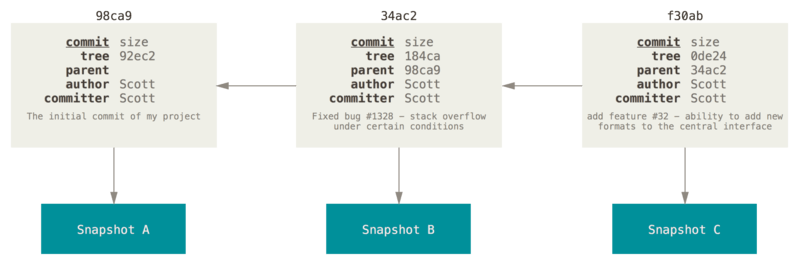

## Větvení - tam začíná zábava

``` bash
git branch testing
```

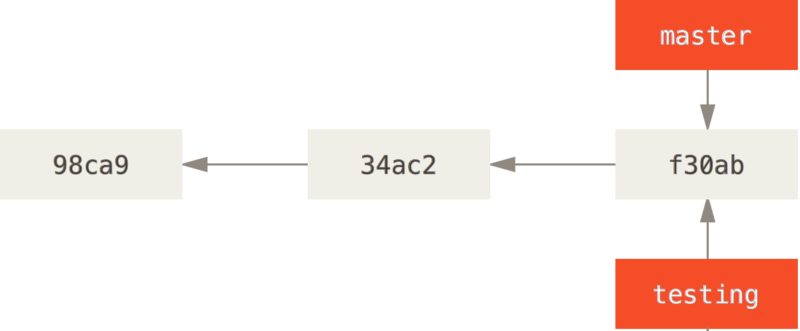

## Větvení - tam začíná zábava

``` bash
git branch testing
```

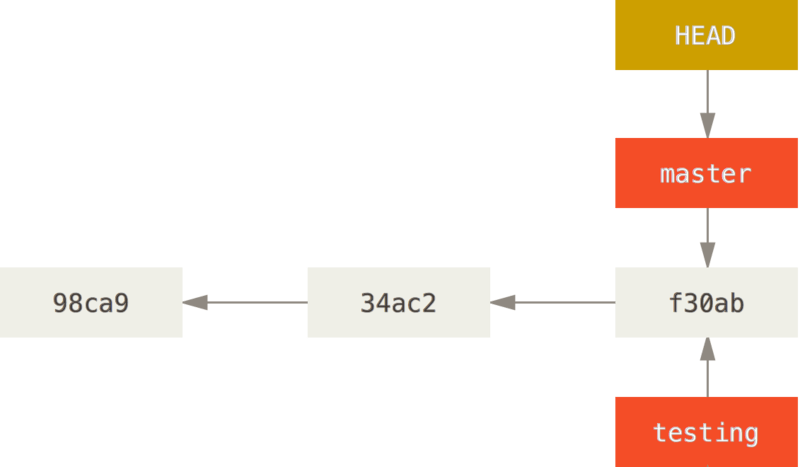

## Větvení - tam začíná zábava

``` bash
git checkout testing
```

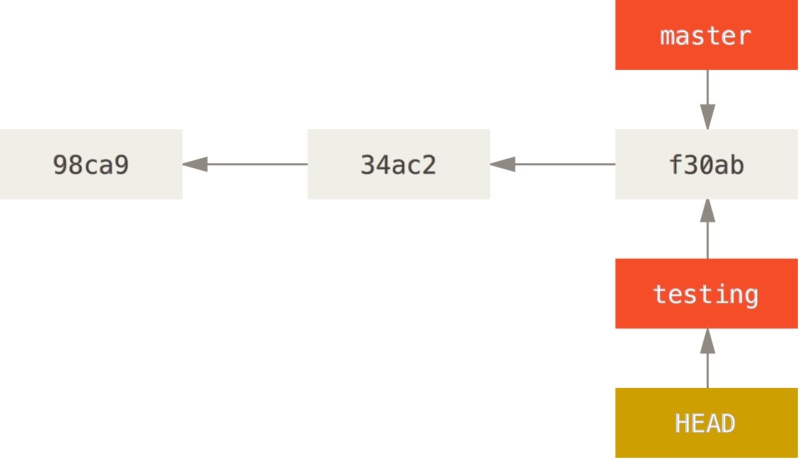

## Větvení - tam začíná zábava

``` bash
vim test.py
git commit -a -m 'Změna je život'
```

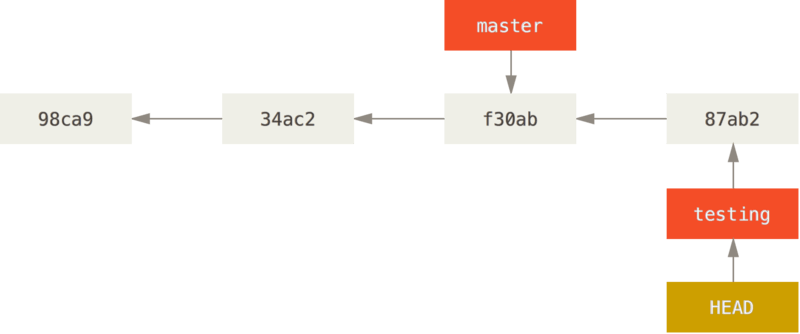

## Větvení - tam začíná zábava

``` bash
git checkout master
vim test.py
git commit -a -m 'Jiná změna'
```

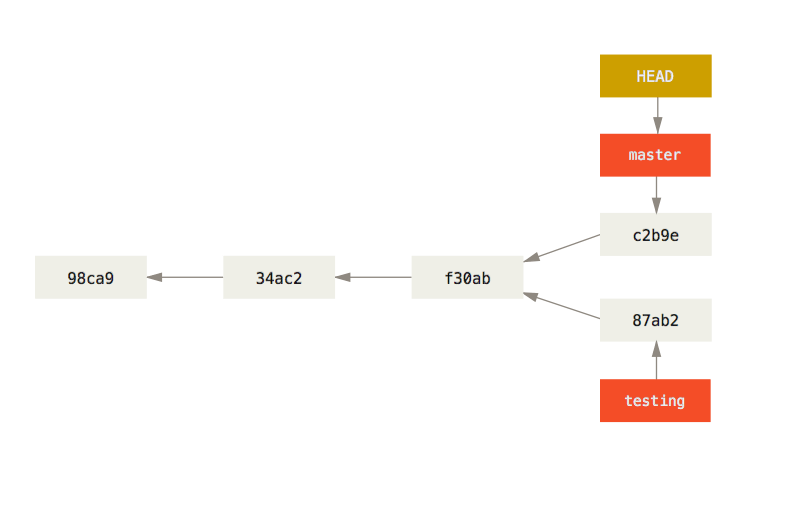

# CI / CD

## Co to je?

-   Continous Integration
    -   automatické testování kódu
    -   code review od kolegů
    -   po schválení merge do jiné větve
    -   více na programování
-   Continous Delivery
    -   Instalace nových verzí software
-   Využijeme je na automatizaci

## Gitlab

-   open source platforma jako github
-   custom hosted: **[gitlab.mff.cuni.cz](https://gitlab.mff.cuni.cz/)**
-   merge request
-   CI/CD workflows –\> to použijeme

## Spouštění CI/CD

-   Definováno ve hlavním adresáři (skrytý soubor `.gitlab-ci.yml`)
-   Commit vede k spuštění pipeline
-   Pipeline má jednu nebo více fází (stage)
-   Fáze má jeden nebo více úkolů (job)
-   Každý úkol je přiřazen runneru, který provádí požadované příkazy
-   Pokud všechny úkoly uspějí, fáze pipeline uspěje a další fáze začne.
    V opačném případě selže fáze a celá pipeline se zastaví.
-   Výsledky pipeline jsou zaznamenány a v případě selhání je odeslán
    e-mail.

## Příklad

``` yaml
stages:
  - evaluate

check-fruit:
  stage: evaluate
  before_script:
    - apk add jq
  script:
    - echo "Downloading datafiles"
    - wget https://filesamples.com/samples/code/json/sample1.json
    - echo "Check available fruits"
    - jq -c '.[]' sample1.json | while read i; do echo $i >> output.txt; done
  artifacts:
    paths:
      - output.txt
```

# Úkol #1

## Zadání

-   Vytvořit soukromé gitlab repo
-   Udělit mi přístup pro čtení (cermp5am)
-   Vytvořit skript (jakýkoli jazyk), který
    -   stáhne všechna naměřená data
    -   načte data, jednotky zkonvertuje do SI
    -   nafituje je pomocí Curie-Weissova zákona
    -   z každých dat vyhodnotí (*{CW}) a (*{eff})
    -   vytvoří jedno PDF, kde budou všechna nafitovaná data (obrázek) a
        výsledky
    -   pdf zůstane jako artifact ukol1.pdf
-   vytvoříte si Pipeline trigger token
    -   pošlete mi na discord/email: token + číslo projektu + branch
    -   vygeneruji nová data a spustím vaši pipeline

## Curie-Weissův zákon

-   popisuje chování materiálů v paramagnetické oblasti nad teplotou
    přechodu.

-   říká, že molární magnetická susceptibilita ($\chi$) materiálu se v
    paramagnetické oblasti nad Curieovou teplotou mění s teplotou (*T*)
    podle vztahu: $$
       \chi = \frac{C}{T - \Theta_{CW}}
    $$ kde $\chi$ je magnetická susceptibilita, $T$ je teplota,
    $\Theta_{CW}$ je Curie-Weissova teplota a $C$ je Curieova konstanta.

-   Více na
    [doi:10.1038/s42005-022-00853-y](https://www.nature.com/articles/s42005-022-00853-y)

## Na co dát pozor

-   jednotky (emu není SI)
-   susceptibilita závisí na poli a magnetizaci
-   doporučuji přepočítat momenty v emu na $\mu_{b}$ (závisí na molární
    hmotnosti!!)
-   počítejte jeden moment na formula unit (=jeden magnetický iont ve
    strukturním vzorci)
-   efektivní moment $\mu_{eff}$ chceme v bohrových magnetonech
    $\mu_{b}$
-   molární magnetická susceptibilita $\chi$ v SI má jednotku $m^3/mol$
-   parsování souborů - použít knihovnu nebo vlastní script?

## Data

### ZDE: <https://user.mgml.eu/automation/vsm/>